# RQ: How do gRPC interceptors affect throughput and latency in microservice architectures?

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load & Clean Data

In [7]:
import datetime
import re
from datetime import timedelta
# base = purpl interceptor disabled altogether
# good = all attributes allowed
# bad = all attributes supressed
# mixed = allowed: 0, generalized: 0, noised: 3 (Gaussian), reduced: 2, supressed: 0
# rand = rand(good, bad, mixed)

# -------------- loading data -------------- #

result_purpl_good_1 = '../results/results_purpl_good_1.csv' # purpl_good
result_purpl_good_2 = '../results/results_purpl_good_2.csv' # purpl_good
result_purpl_good_3 = '../results/results_purpl_good_3.csv' # purpl_good

result_purpl_bad_1 = '../results/results_purpl_bad_1.csv'   # purpl_bad
result_purpl_bad_2 = '../results/results_purpl_bad_2.csv'   # purpl_bad
result_purpl_bad_3 = '../results/results_purpl_bad_3.csv'   # purpl_bad

result_purpl_base_1 = '../results/results_purpl_base_1.csv' # purpl_baseline
result_purpl_base_2 = '../results/results_purpl_base_2.csv' # purpl_baseline
result_purpl_base_3 = '../results/results_purpl_base_3.csv' # purpl_baseline

results_purpl_mixed_1 = '../results/results_purpl_mixed_1.csv' # purpl_mixed
results_purpl_mixed_2 = '../results/results_purpl_mixed_2.csv' # purpl_mixed
results_purpl_mixed_3 = '../results/results_purpl_mixed_3.csv' # purpl_mixed

results_purpl_rand_1 = '../results/results_purpl_rand_1.csv' # purpl_rand
results_purpl_rand_2 = '../results/results_purpl_rand_2.csv' # purpl_rand
results_purpl_rand_3 = '../results/results_purpl_rand_3.csv' # purpl_rand

results_generalized_1 = '../results/anon-functions/results_generalized_1.csv' # generalized
results_generalized_2 = '../results/anon-functions/results_generalized_2.csv' # generalized
results_generalized_3 = '../results/anon-functions/results_generalized_3.csv' # generalized

results_noised_1 = '../results/anon-functions/results_noised_1.csv' # noised
results_noised_2 = '../results/anon-functions/results_noised_2.csv' # noised
results_noised_3 = '../results/anon-functions/results_noised_3.csv' # noised

results_reduced_1 = '../results/anon-functions/results_reduced_1.csv' # reduced
results_reduced_2 = '../results/anon-functions/results_reduced_2.csv' # reduced
results_reduced_3 = '../results/anon-functions/results_reduced_3.csv' # reduced

# ---------------------------------------------------- #

data_purpl_good_1 = pd.read_csv(result_purpl_good_1)
data_purpl_good_2 = pd.read_csv(result_purpl_good_2)
data_purpl_good_3 = pd.read_csv(result_purpl_good_3)

data_purpl_bad_1 = pd.read_csv(result_purpl_bad_1)
data_purpl_bad_2 = pd.read_csv(result_purpl_bad_2)
data_purpl_bad_3 = pd.read_csv(result_purpl_bad_3)

data_purpl_base_1 = pd.read_csv(result_purpl_base_1)
data_purpl_base_2 = pd.read_csv(result_purpl_base_2)
data_purpl_base_3 = pd.read_csv(result_purpl_base_3)

data_purpl_mixed_1 = pd.read_csv(results_purpl_mixed_1)
data_purpl_mixed_2 = pd.read_csv(results_purpl_mixed_2)
data_purpl_mixed_3 = pd.read_csv(results_purpl_mixed_3)

data_purpl_rand_1 = pd.read_csv(results_purpl_rand_1)
data_purpl_rand_2 = pd.read_csv(results_purpl_rand_2)
data_purpl_rand_3 = pd.read_csv(results_purpl_rand_3)

data_generalized_1 = pd.read_csv(results_generalized_1)
data_generalized_2 = pd.read_csv(results_generalized_2)
data_generalized_3 = pd.read_csv(results_generalized_3)

data_noised_1 = pd.read_csv(results_noised_1)
data_noised_2 = pd.read_csv(results_noised_2)
data_noised_3 = pd.read_csv(results_noised_3)

data_reduced_1 = pd.read_csv(results_reduced_1)
data_reduced_2 = pd.read_csv(results_reduced_2)
data_reduced_3 = pd.read_csv(results_reduced_3)

datasets = [data_purpl_good_1, data_purpl_good_2, data_purpl_good_3,
            data_purpl_bad_1, data_purpl_bad_2, data_purpl_bad_3,
            data_purpl_base_1, data_purpl_base_2, data_purpl_base_3,
            data_purpl_mixed_1, data_purpl_mixed_2, data_purpl_mixed_3,
            data_purpl_rand_1, data_purpl_rand_2, data_purpl_rand_3,
            data_generalized_1, data_generalized_2, data_generalized_3,
            data_noised_1, data_noised_2, data_noised_3,
            data_reduced_1, data_reduced_2, data_reduced_3]

# -------------- cleaning data -------------- #

# Helper function to convert latency string to float
def convert_latency_to_ms(latency_str):
    if 'ms' in latency_str:
        return float(latency_str.replace('ms', '').strip())
    elif 'µs' in latency_str:
        return float(latency_str.replace('µs', '').strip()) / 1000
    else:
        return 0
    
def remove_s(time_elapsed):
    # Extract the minutes from the time duration
    # format: 1m2.345s

    if 'm' in time_elapsed:
        minutes = time_elapsed.split('m')[0]
        seconds = time_elapsed.split('m')[1]
        seconds = float(seconds.replace('s', '').strip())

        result = float(minutes)*60 + seconds
        return result
    return float(time_elapsed.replace('s', '').strip())

# Apply the function to Min and Max Latency columns
for data in datasets:
    # remove the row of zeroes at the beginning (warmup/init)
    data.drop([0], inplace=True)

    data['Average Latency'] = data['Average Latency'].apply(convert_latency_to_ms)
    data['Max Latency'] = data['Max Latency'].apply(convert_latency_to_ms)
    data['Min Latency'] = data['Min Latency'].apply(convert_latency_to_ms)
    data['Time Elapsed'] = data['Time Elapsed'].apply(remove_s)

# -------------- helper functions -------------- #

def calculate_time_difference(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'].apply(lambda x: x.split('+')[0]))
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Calculate the time difference
    time_difference = df['Timestamp'].iloc[-1] - df['Timestamp'].iloc[0]
    
    return time_difference



## Turn 3 data files into 1 avg_data file

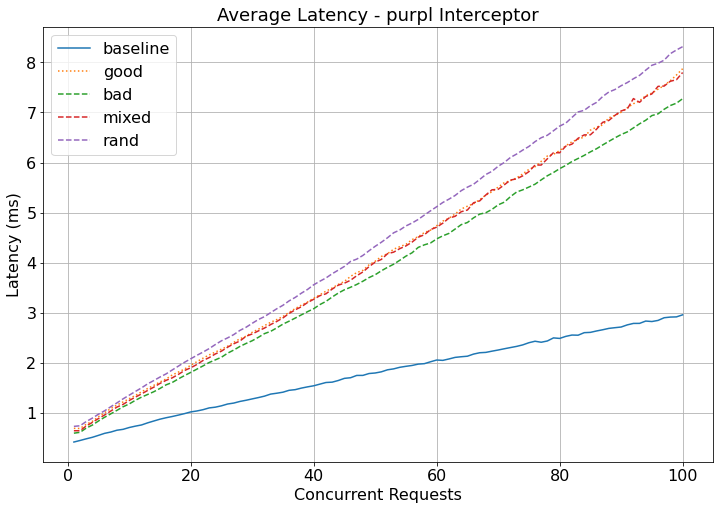

In [8]:
def calculate_average_df(df1, df2, df3):
    # Ensure that the DataFrames are aligned (same shape and index/column labels)
    if not (df1.shape == df2.shape == df3.shape and
            df1.index.equals(df2.index) and df1.index.equals(df3.index) and
            df1.columns.equals(df2.columns) and df1.columns.equals(df3.columns)):
        raise ValueError("All DataFrames must have the same shape and matching index and column labels.")
    
    # Identify numeric columns in the DataFrames
    numeric_cols = df1.select_dtypes(include=np.number).columns
    
    # Calculate the element-wise sum and then divide by 3 for numeric columns only
    average_df = pd.DataFrame(index=df1.index, columns=df1.columns)
    average_df[numeric_cols] = (df1[numeric_cols] + df2[numeric_cols] + df3[numeric_cols]) / 3

    return average_df

avg_purpl_good = calculate_average_df(data_purpl_good_1, data_purpl_good_2, data_purpl_good_3)
avg_purpl_bad = calculate_average_df(data_purpl_bad_1, data_purpl_bad_2, data_purpl_bad_3)
avg_purpl_base = calculate_average_df(data_purpl_base_1, data_purpl_base_2, data_purpl_base_3)
avg_purpl_mixed = calculate_average_df(data_purpl_mixed_1, data_purpl_mixed_2, data_purpl_mixed_3)
avg_purpl_rand = calculate_average_df(data_purpl_rand_1, data_purpl_rand_2, data_purpl_rand_3)
avg_generalized = calculate_average_df(data_generalized_1, data_generalized_2, data_generalized_3)
avg_noised = calculate_average_df(data_noised_1, data_noised_2, data_noised_3)
avg_reduced = calculate_average_df(data_reduced_1, data_reduced_2, data_reduced_3)

# -------------- plotting data -------------- #
plt.figure(figsize=(12, 8))
plt.plot(avg_purpl_base['Average Latency'], label='baseline')
plt.plot(avg_purpl_good['Average Latency'], label='good', linestyle='dotted')
plt.plot(avg_purpl_bad['Average Latency'], label='bad', linestyle='--')
plt.plot(avg_purpl_mixed['Average Latency'], label='mixed', linestyle='--')
plt.plot(avg_purpl_rand['Average Latency'], label='rand', linestyle='--')

plt.title('Average Latency - purpl Interceptor', fontsize=18)
plt.ylabel('Latency (ms)', fontsize=16)
plt.xlabel('Concurrent Requests', fontsize=16)
plt.grid(True)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=16)
plt.show()

## Legend Explanation:
- `baseline`: interceptor is disabled
else: interceptor is enabled
- `good`: acc. to policy, all requested fields are allowed. (client always baves well)
- `bad`: acc. to policy, all requested fields are denied. (client always misbehaves)
- `mixed`: acc. to policy, some requested fields are allowed and some are denied. (client always misbehaves on the same data fields and behaves well on the other)
- `random`: client randomly choses one of the 3 cases [good/bad/mixed] (client behaves randomly)

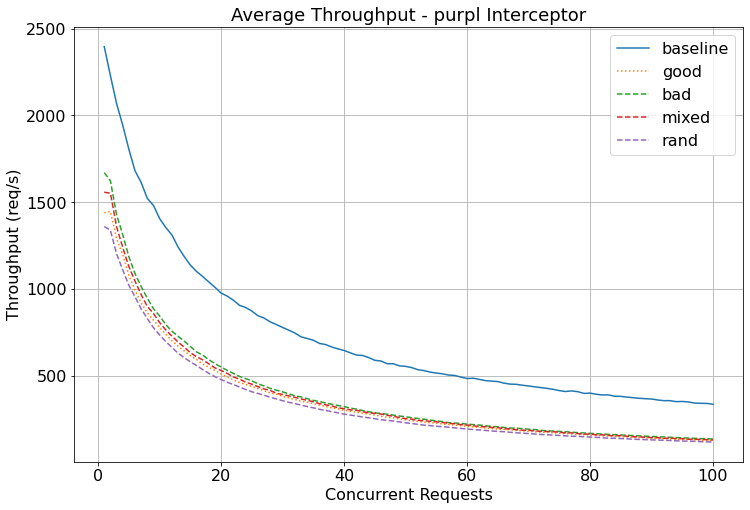

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(avg_purpl_base['Avg. Throughput req/s'], label='baseline')
plt.plot(avg_purpl_good['Avg. Throughput req/s'], label='good', linestyle='dotted')
plt.plot(avg_purpl_bad['Avg. Throughput req/s'], label='bad', linestyle='--')
plt.plot(avg_purpl_mixed['Avg. Throughput req/s'], label='mixed', linestyle='--')
plt.plot(avg_purpl_rand['Avg. Throughput req/s'], label='rand', linestyle='--')


plt.title('Average Throughput - purpl Interceptor', fontsize=18)
plt.ylabel('Throughput (req/s)', fontsize=16)
plt.xlabel('Concurrent Requests', fontsize=16)
plt.grid(True)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=16)
plt.show()

## How long does it take to send 100.000 requests?

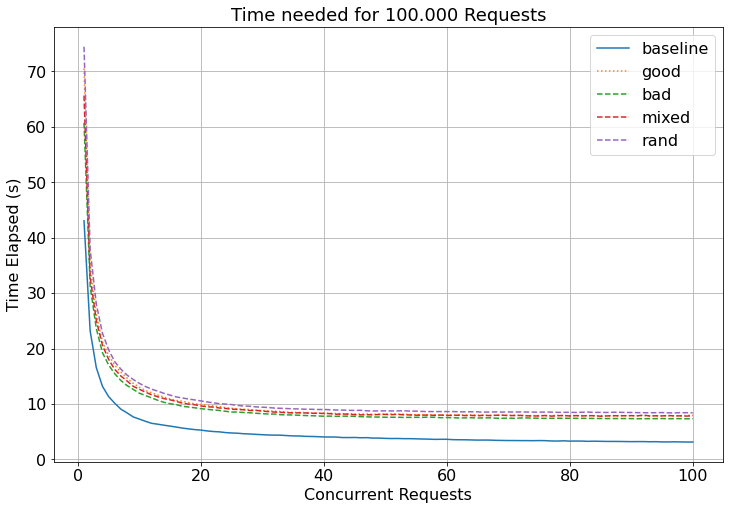

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(avg_purpl_base['Concurrent Requests'], avg_purpl_base ['Time Elapsed'], label='baseline')
plt.plot(avg_purpl_good['Concurrent Requests'], avg_purpl_good ['Time Elapsed'], label='good', linestyle='dotted')
plt.plot(avg_purpl_bad['Concurrent Requests'], avg_purpl_bad ['Time Elapsed'], label='bad', linestyle='--')
plt.plot(avg_purpl_mixed['Concurrent Requests'], avg_purpl_mixed ['Time Elapsed'], label='mixed', linestyle='--')
plt.plot(avg_purpl_rand['Concurrent Requests'], avg_purpl_rand ['Time Elapsed'], label='rand', linestyle='--')

plt.title('Time needed for 100.000 Requests', fontsize=18)
plt.xlabel('Concurrent Requests', fontsize=16)
plt.ylabel('Time Elapsed (s)', fontsize=16)
#plt.yticks(np.arange(0, 1, 0.1))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=16)
plt.grid(True)
plt.show()

## Focus on the 3 privacy functions: Generalization, Noising and Reduction

### Average Latency

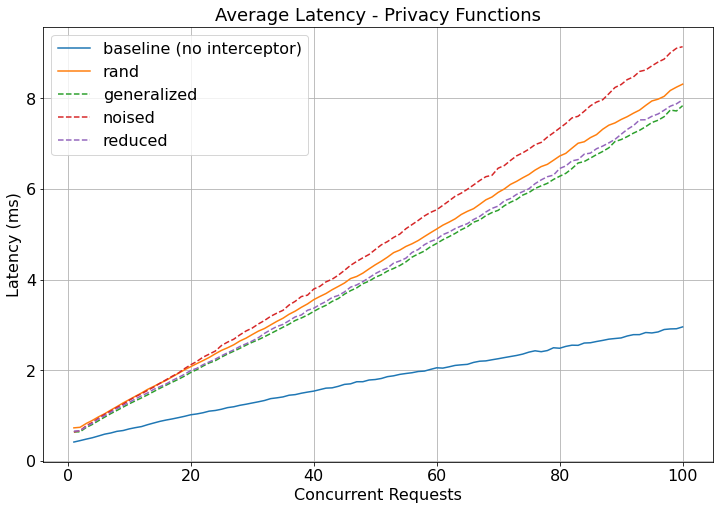

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(avg_purpl_base['Concurrent Requests'], avg_purpl_base ['Average Latency'], label='baseline (no interceptor)')
plt.plot(avg_purpl_rand['Concurrent Requests'], avg_purpl_rand ['Average Latency'], label='rand')
plt.plot(avg_generalized['Concurrent Requests'], avg_generalized ['Average Latency'], label='generalized', linestyle='--')
plt.plot(avg_noised['Concurrent Requests'], avg_noised ['Average Latency'], label='noised', linestyle='--')
plt.plot(avg_reduced['Concurrent Requests'], avg_reduced ['Average Latency'], label='reduced', linestyle='--')

plt.title('Average Latency - Privacy Functions', fontsize=18)
plt.xlabel('Concurrent Requests', fontsize=16)
plt.ylabel('Latency (ms)', fontsize=16)
plt.grid(True)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=16)
plt.show()

### Average Throughput

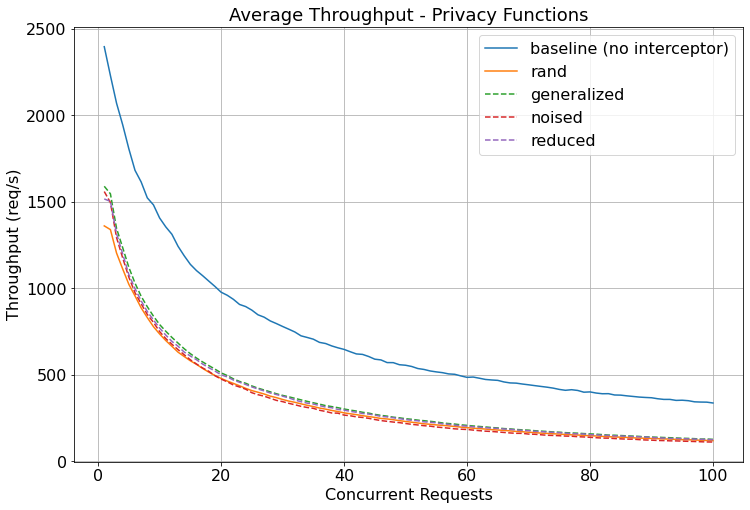

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(avg_purpl_base['Concurrent Requests'], avg_purpl_base ['Avg. Throughput req/s'], label='baseline (no interceptor)')
plt.plot(avg_purpl_rand['Concurrent Requests'], avg_purpl_rand ['Avg. Throughput req/s'], label='rand')
plt.plot(avg_generalized['Concurrent Requests'], avg_generalized ['Avg. Throughput req/s'], label='generalized', linestyle='--')
plt.plot(avg_noised['Concurrent Requests'], avg_noised ['Avg. Throughput req/s'], label='noised', linestyle='--')
plt.plot(avg_reduced['Concurrent Requests'], avg_reduced ['Avg. Throughput req/s'], label='reduced', linestyle='--')

plt.title('Average Throughput - Privacy Functions', fontsize=18)
plt.xlabel('Concurrent Requests', fontsize=16)
plt.ylabel('Throughput (req/s)', fontsize=16)
plt.grid(True)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=16)
plt.show()